# Описание проекта
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.
Вам предстоит изучить:
откуда приходят пользователи и какими устройствами они пользуются,
сколько стоит привлечение пользователей из различных рекламных каналов;
сколько денег приносит каждый клиент,
когда расходы на привлечение клиента окупаются,
какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### 1. Импортирем библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta

####  2.Считываем данные из csv-файлов в датафреймы и сохраняем в переменные

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

#### 3. Изучаем общую информацию о полученных датафреймах

In [3]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
#заметили что названия столбцов нужно привести к нижнему регистру, сделаем это:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [7]:
#поменяем пробелы в названиях столбцов на нижнее подчеркивание "_":
visits.columns = visits.columns.str.replace(' ', '_')
orders.columns = orders.columns.str.replace(' ', '_')

In [8]:
#выведем основую информацию о датафреймах
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [11]:
#проверим датафреймы на дубликаты
visits.duplicated().sum()

0

In [12]:
orders.duplicated().sum()

0

In [13]:
costs.duplicated().sum()

0

In [14]:
#переведем столбцы к фармату datetime:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

**Вывод: на 1 шаге мы:**

-импортировали библиотеки

-записали данные в 3 датафрейма

-переписали названия столбцов для удобства

-проверили датафреймы на пропуски и дубликаты

-заменили типы данных на datetime в столбцах с датами

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### 1. Функция для создания пользовательских профилей

In [15]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format = '%Y-%m-%d')
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### 2. Функция для расчёта удержания

In [16]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### 3. Функция для расчёта конверсии

In [17]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### 4. Функция для расчёта LTV и ROI

In [18]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### 5. А также функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi()

In [19]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [20]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [21]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [22]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Вывод: на 2 шаге мы:**

- задали основные функции:

    — для создания профилей пользователей;
    
    — для подсчёта Retention Rate;
    
    — для подсчёта конверсии;
    
    — для подсчёта LTV.
    
    
- а также функции для построения графиков:

    — для сглаживания данных;
    
    — для построения графика Retention Rate;
    
    — для построения графика конверсии;
    
    — для визуализации LTV и ROI.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### 1. Составим профили пользователей.

In [23]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [24]:
#минимальная дата привлечения:
print(profiles['first_ts'].min())

2019-05-01 00:00:41


In [25]:
#максимальная дата привлечения:
print(profiles['first_ts'].max())

2019-10-27 23:59:04


**Вывод:**
 - минимальная дата привлечения 1 мая 2019г;
 - максимальная дата привлечения 27 октября 2019г.
 
*Все верно, в условии ТЗ так и сказано.*


#### 2. Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [26]:
region_buy = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by = 'user_id', ascending = False)
region_buy['payer_per'] = region_buy['payer'] / region_buy['user_id'] * 100
region_buy.drop('payer', axis = 1)

,user_id,payer_per
region,,
United States,100002,6.901862
UK,17575,3.982930
France,17450,3.799427
Germany,14981,4.111875


**Вывод:**
 - больше всего пользователей из United States 100 тыс, из них 6,9% платящих;
 - второе место у UK - это 17,5 тыс пользователей, из них 4% платящих;
 - третье место у France - это 17,4 тыс пользователей, из них 3,8% платящих.

#### 3. Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [27]:
device_buy = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by = 'user_id', ascending = False)
device_buy['payer_per'] = device_buy['payer'] / device_buy['user_id'] * 100
device_buy.drop('payer', axis = 1)

,user_id,payer_per
device,,
iPhone,54479,6.207897
Android,35032,5.851793
PC,30455,5.046790
Mac,30042,6.364423


**Вывод:**
- Больше всего пользователей, которые предпочитают iPhone, из них 6,2% платящих;
- На втором месте пользователи Android - 35 тыс пользователей, из них 5,85% платящих.

#### 4. Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.

In [28]:
channel_buy = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'})
channel_buy['payer_per'] = channel_buy['payer'] / channel_buy['user_id'] * 100
channel_buy.sort_values(by = 'payer', ascending = False)

,user_id,payer,payer_per
channel,,,
FaceBoom,29144,3557,12.204914
TipTop,19561,1878,9.600736
organic,56439,1160,2.055316
WahooNetBanner,8553,453,5.296387
AdNonSense,3880,440,11.340206
RocketSuperAds,4448,352,7.913669
LeapBob,8553,262,3.063253
OppleCreativeMedia,8605,233,2.707728
lambdaMediaAds,2149,225,10.469986


**Вывод:**

топ-3:
- FaceBoom, 3,5 тыс платящих пользователей из 29тыс привлеченных;
- TipTop - 1,8  тыс платящих пользователей из 19,5 тыс привлеченных; 
- organic - 1,1 тыс платящих пользователей из 56 тыс привлеченных.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### 1. Посчитаем общую сумму расходов на маркетинг.

In [29]:
costs['costs'].sum()

105497.30000000002

**Вывод:**
- Общая сумма расхода на маркетинг 105497 у.е.

#### 2. Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [30]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending = False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Вывод:**
- Выбиваются 2 канала: TipTop и FaceBoom. Их значения в разы больше, чем у остальных источников. Можно сделать вывод, что это 2 основных рекламных источника, откуда приходят пользователи.

#### 3. Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [31]:
#добавим столбцы с номером недели и месяца
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

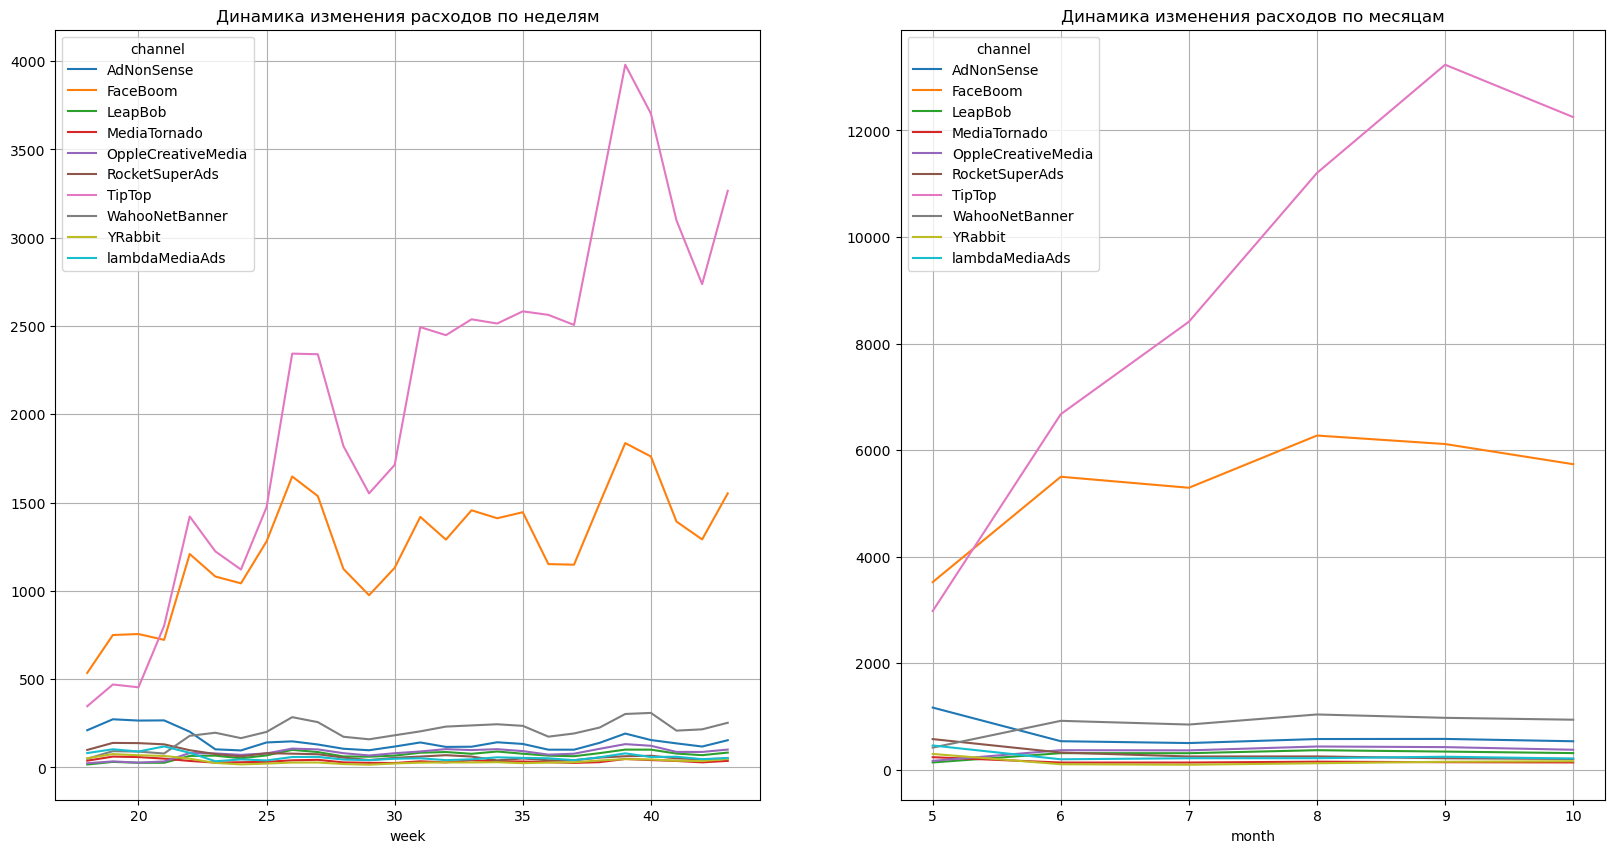

In [32]:
#строим графики
plt.figure(figsize=(20, 10))
costs.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(grid = True, ax = plt.subplot(1, 2, 1))
plt.title('Динамика изменения расходов по неделям')

costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(grid = True, ax = plt.subplot(1, 2, 2))
plt.title('Динамика изменения расходов по месяцам')
plt.show()

**Вывод:**
- Аналогично, здесь также выбиваются TipTop, FaceBoom. Ничего странного, много пользователей - много затрат. 

#### 4. Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

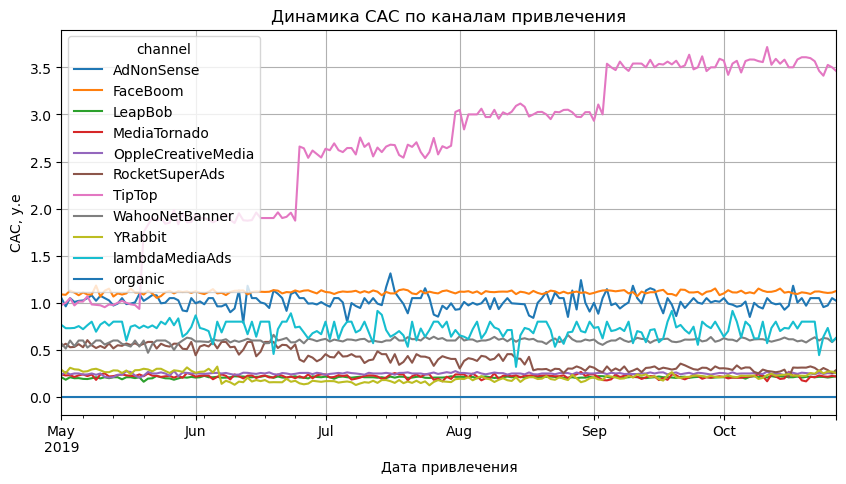

In [33]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, у.е')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [43]:
#привлечение одного пользователя в среднем по каждому каналу стоило:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).mean().sort_values(ascending = False)

channel
TipTop                2.655599
FaceBoom              1.112864
AdNonSense            1.010467
lambdaMediaAds        0.721029
WahooNetBanner        0.599336
RocketSuperAds        0.406634
OppleCreativeMedia    0.249327
MediaTornado          0.218692
YRabbit               0.211194
LeapBob               0.209443
dtype: float64

**Вывод:**
- Здесь оказались интересны значения динамики CAC по каналу TipTop - стоимость привлечения одного пользователя выросла в 3,5 раза за 5 месяцев
- Самыми дорогими в среднем за все время оказались каналы TipTop, FaceBoom, AdNonSense.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### 1. Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [35]:
#зададим момент и горизонт анализа, согласно ТЗ
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 
#исключим канал organic, так как стоимость их привлечения 0
profiles = profiles.query('channel != "organic"')

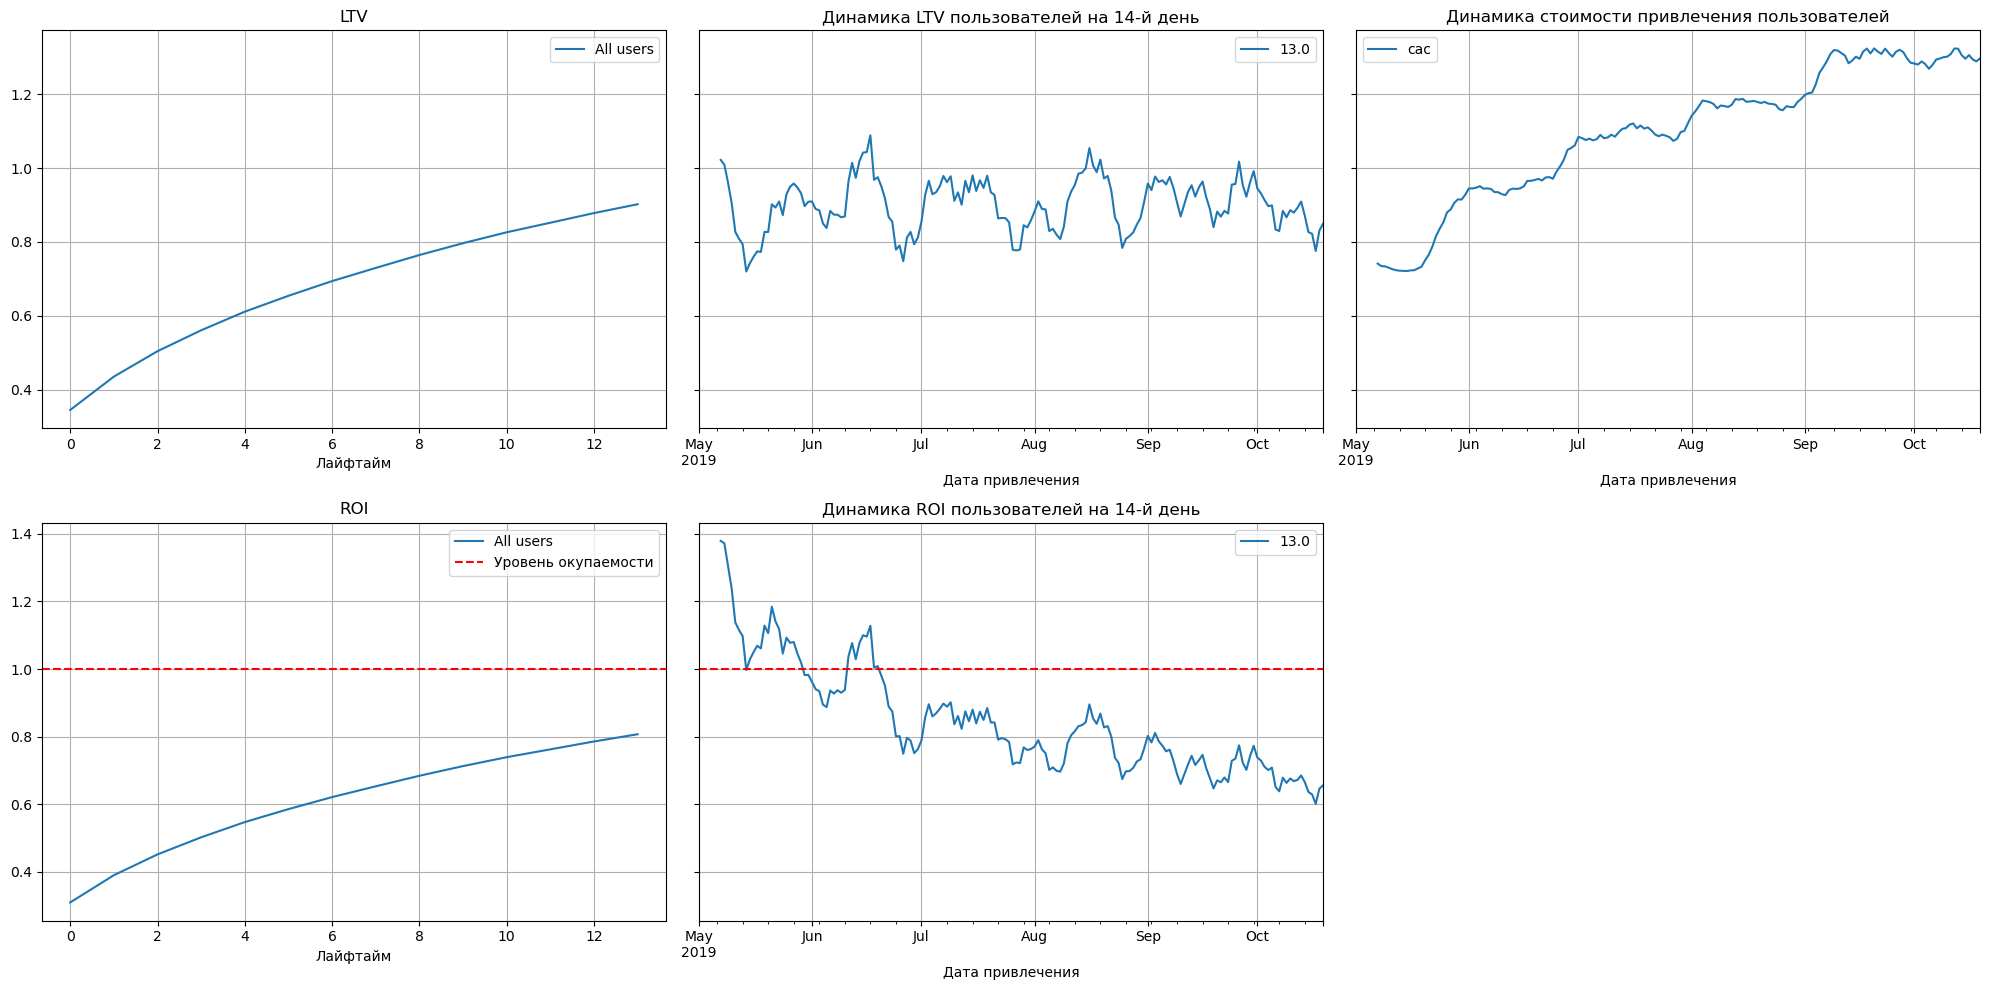

In [36]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**По графикам можно сделать такие выводы:**
- Реклама не окупается. ROI в конце недели — чуть выше 80%.
- CAC растет. Рекламный бюджет постоянно увеличивается.
- Показатель LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

#### 2. Проверим конверсию пользователей, динамику её изменения, удержание пользователей и динамику ее изменения.

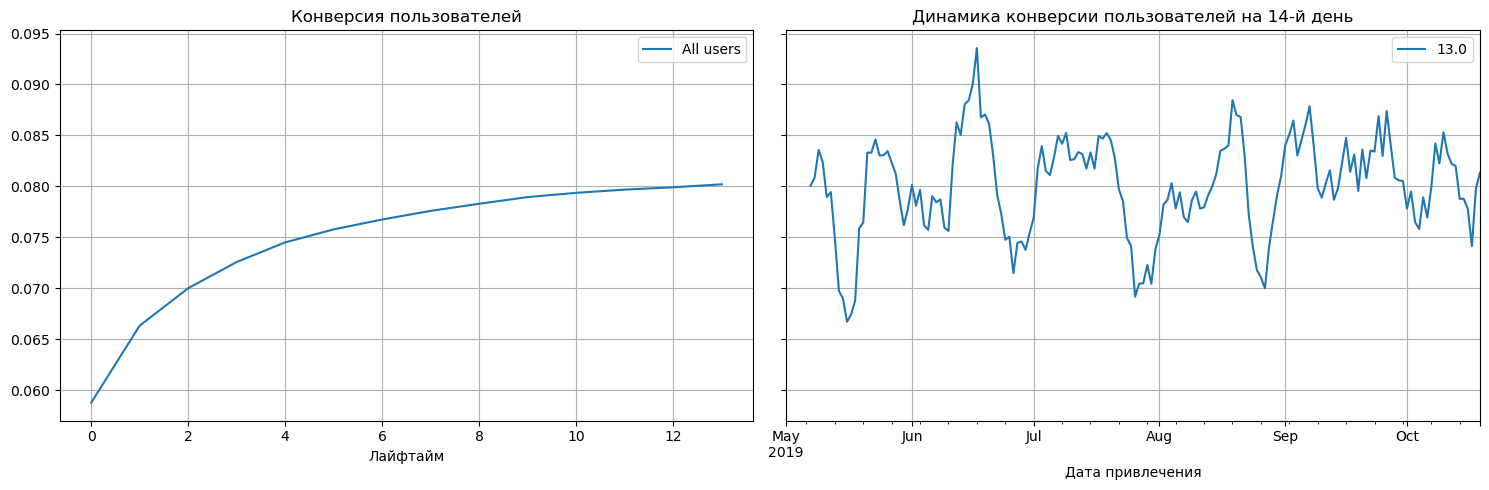

In [37]:
#построим графики конверсии и динамики конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:**
- Конверсия хорошая, причем постоянная.

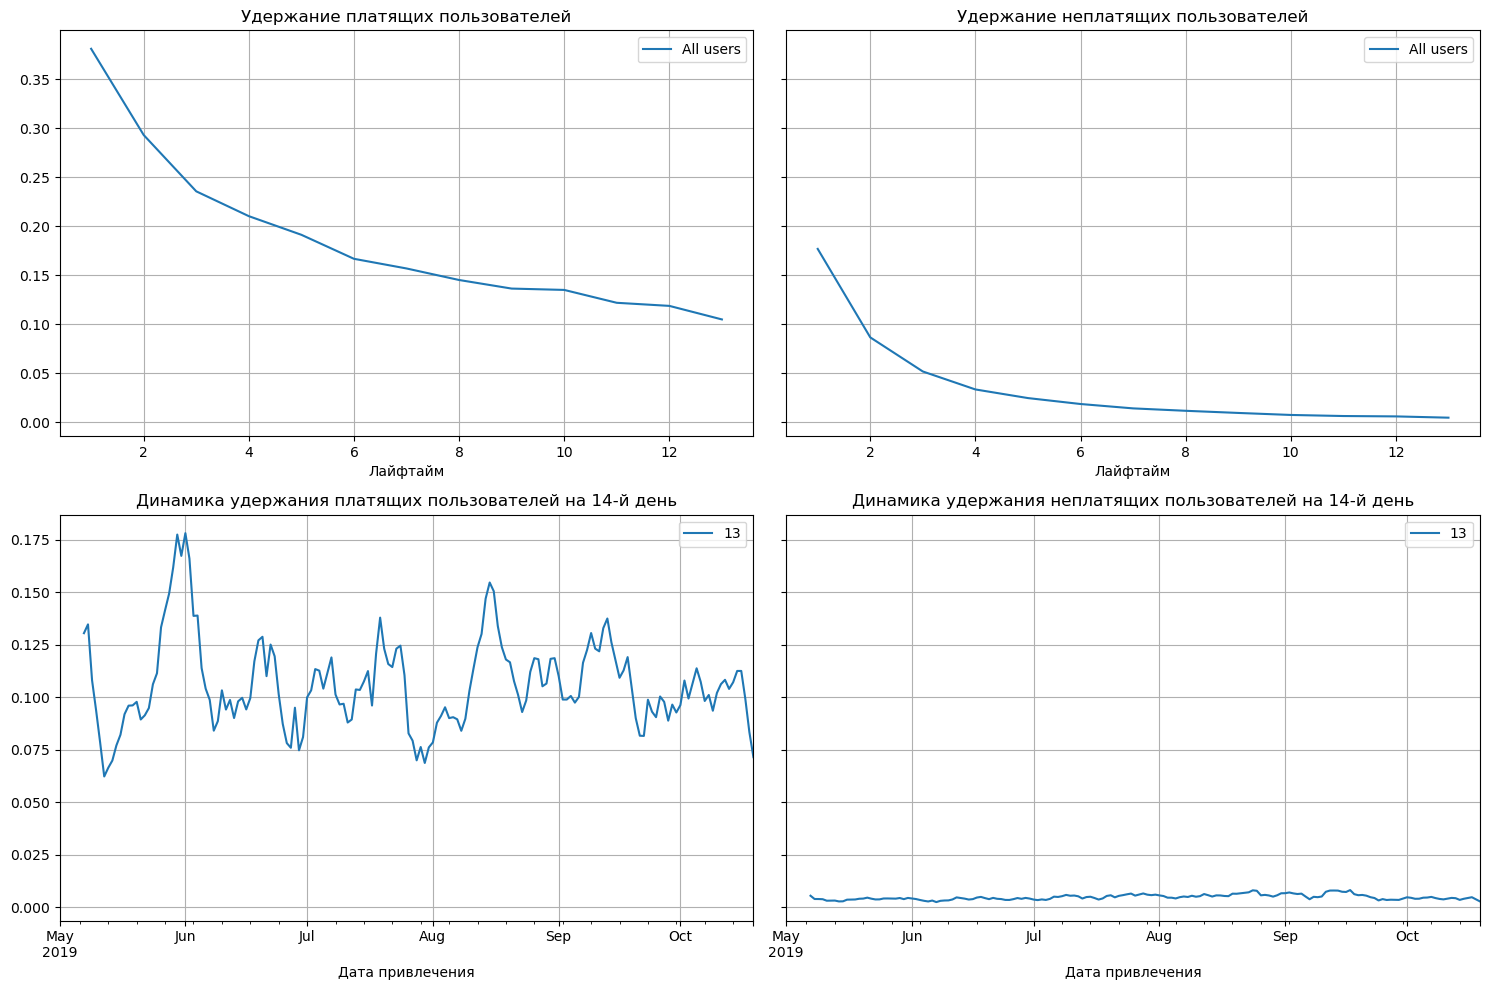

In [38]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**
- Неплатящие пользователи плохо удерживаются. В принципе, это нормально, им нечего терять.
- Платящие пользователи удерживаются заметно лучше.

#### 3.Проанализируем окупаемость рекламы с разбивкой по устройствам.

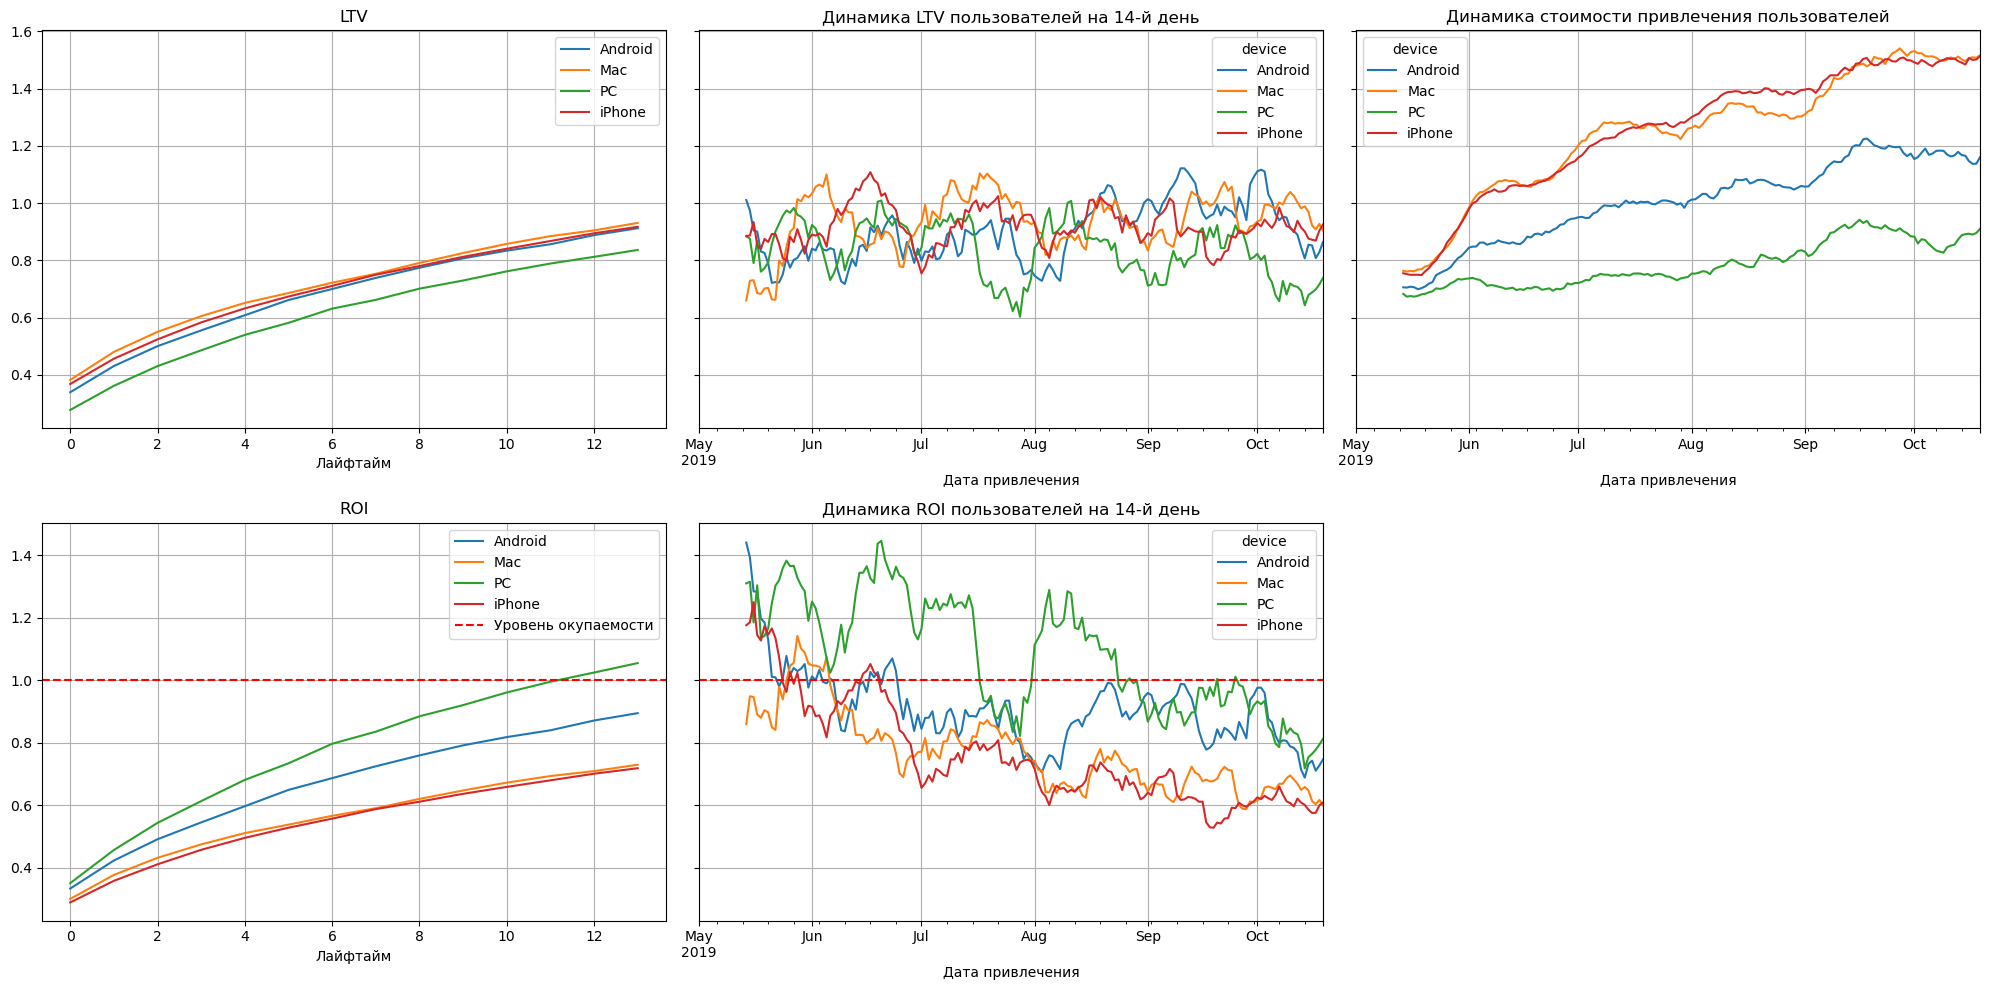

In [39]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** 
- окупаются к 14 дню только поьзователи персональых компьютеров;
- пользователи iPhone и Mac не окупаются за 2 недели. Скорее всего дело в стоимости привлечения этих устройств(она значительно выше, чем стоимость привлечения других устройств.

#### 4.Проанализируем окупаемость рекламы с разбивкой по странам.

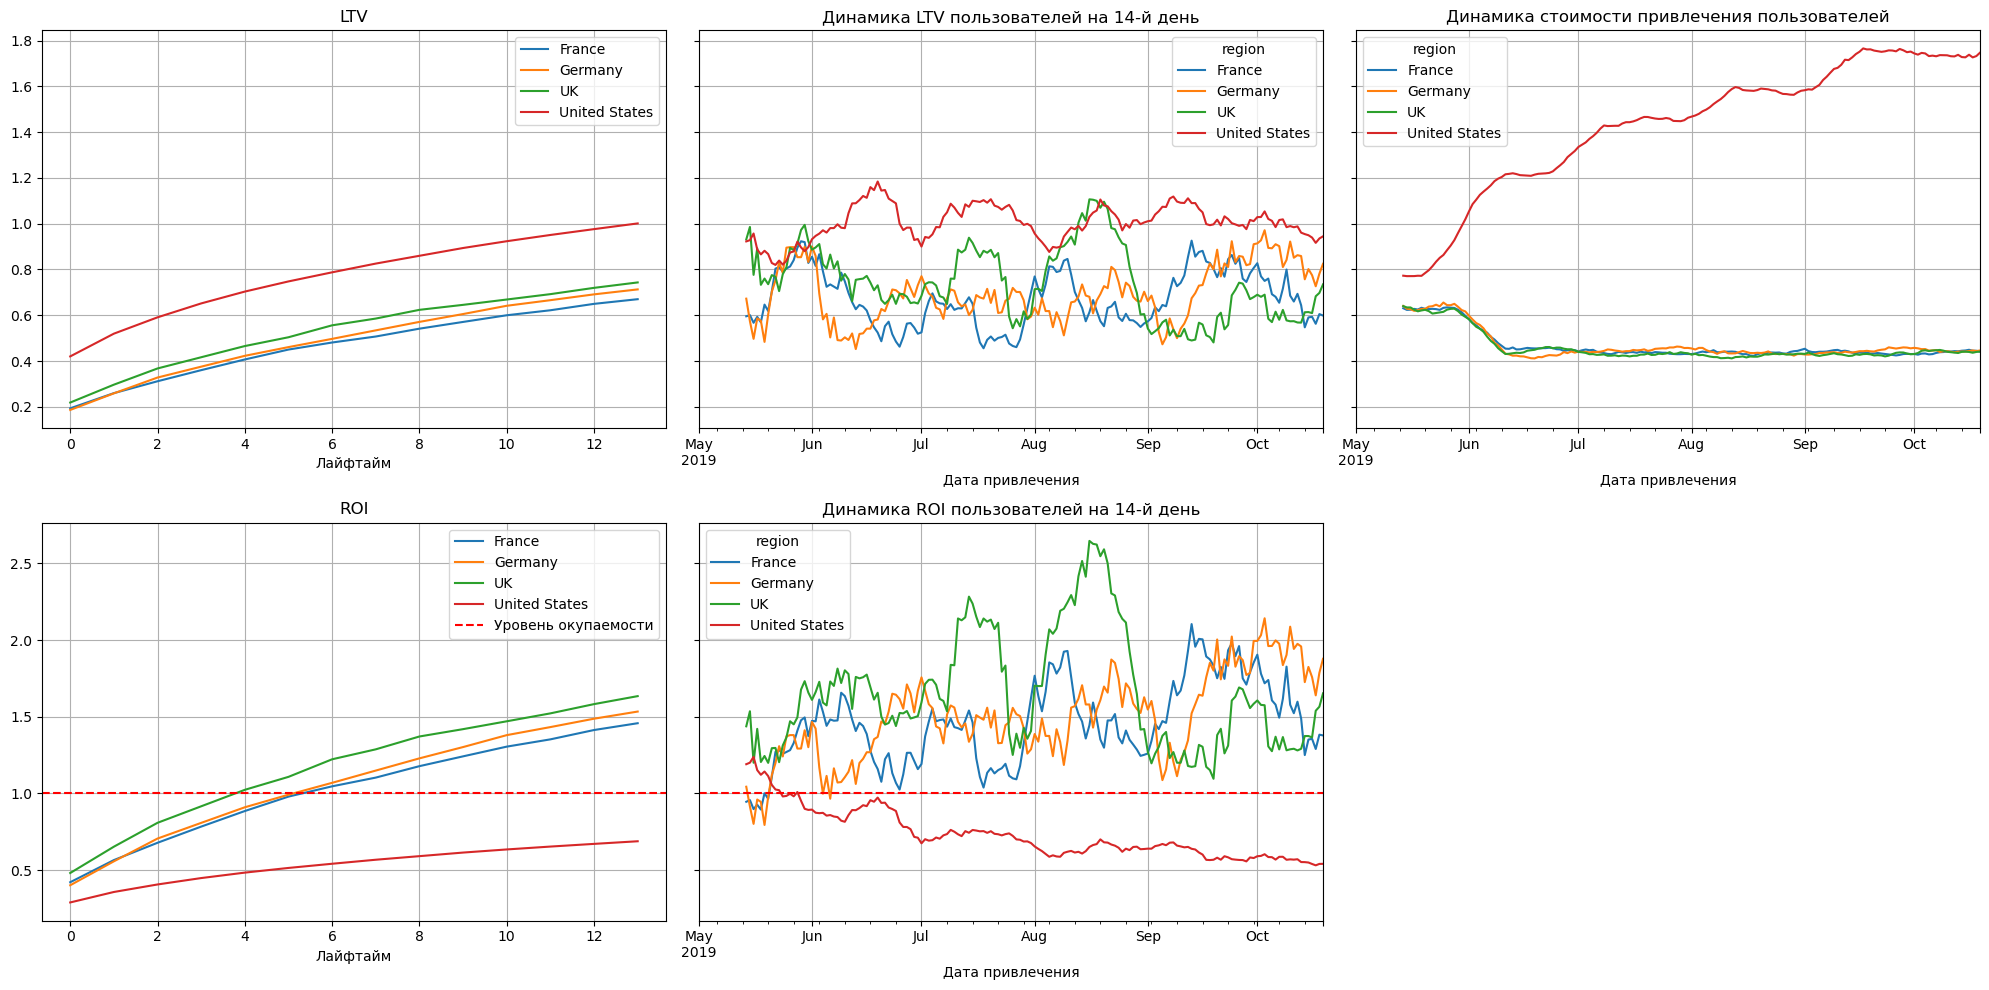

In [40]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**
- Здесь видим, что привлечение пользователей из United States, которые составляют основную массу 100 тыс человек, обходятся очень дорого. Стоимость привлечения одного пользователя из United States в 4 раза дороже(в октябре), чем привлечение пользователя из других стран.
- Пользователи из United States не окупаются за 2 недели, к концу 14 дня их окупаемость всего около 60%

#### 5.Проанализируем окупаемость рекламы с разбивкой по каналам.

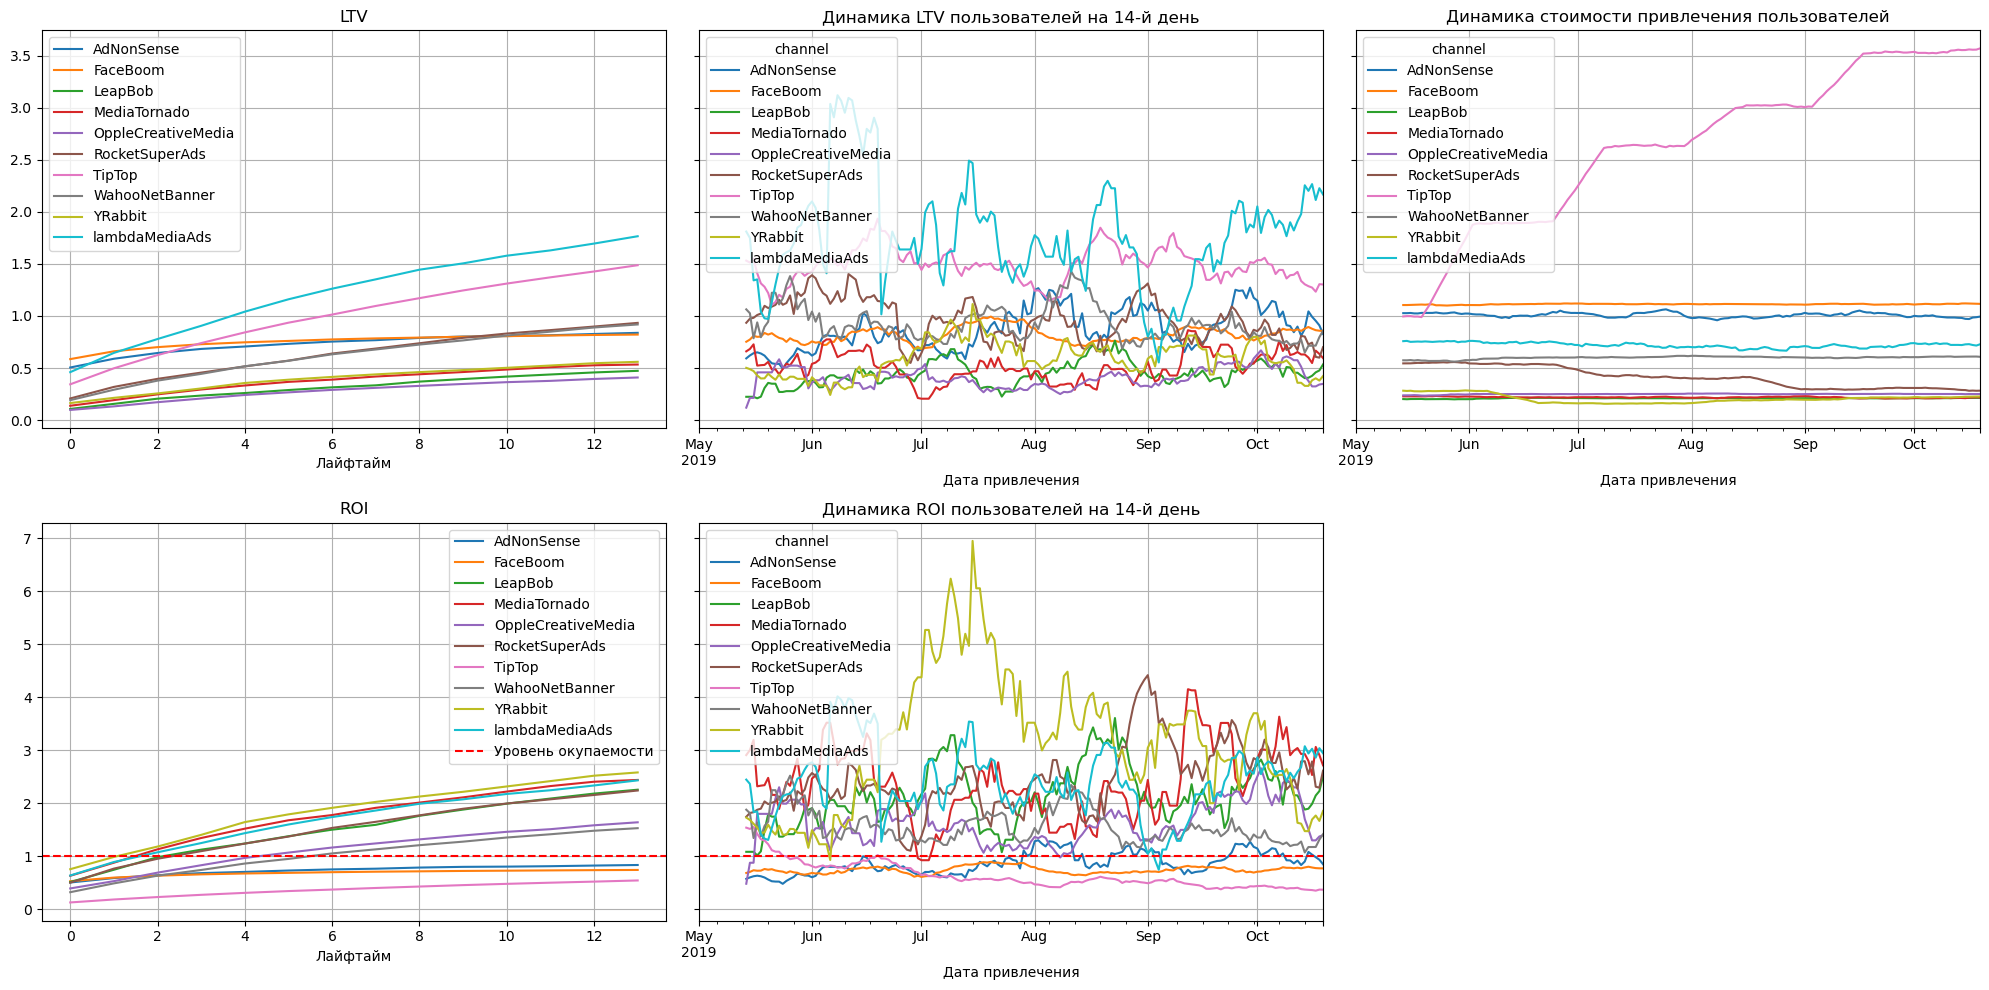

In [41]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод:**
- Пользователи пришедшие из каналов TipTop, FaceBoom и AdNonSence не окупаются за 14 дней.

**Заключение:**
- 1. В целом реклама на привлечение пользователей не окупается.

- 2. Негативное влияние на окупаемость рекламы оказывают: 

        - пользователи из United States(основная масса пользователей), они обходятся в несколько раз дороже, чем пользователи из других стран. Как итог, они не окупаются;
        - пользователи, которые пользуются iPhone(основная масса пользователей) и Mac обходятся дороже, чем пользователи других устройств;
        - пользователи, пришедшие из каналов TipTop, FaceBoom и AdNonSence не окупаются, так как их привлечение дороже остальных.
        
- 3. Проблемы окупаемости вызваны тем, что затраты на привлечение пользователей основных масс, обходятся слишком дорого.

### 1. Общий вывод:

**Описание данных**

В вашем распоряжении три датасета. Файл **visits_info_short.csv** хранит лог сервера с информацией о посещениях сайта, **orders_info_short.csv** — информацию о заказах, а **costs_info_short.csv** — информацию о расходах на рекламу.

Структура visits_info_short.csv:

- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии. 

Структура orders_info_short.csv:

- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs_info_short.csv:

- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

**На этапе ознакомления с данными и их предобработкой мы:**

-импортировали библиотеки;

-записали данные в 3 датафрейма;

-переписали названия столбцов для удобства;

-проверили датафреймы на пропуски и дубликаты;

-заменили типы данных на datetime в столбцах с датами.

**На 2 шаге мы:**

- задали основные функции:

  - get_profiles() — для создания профилей пользователей,
  - get_retention() — для подсчёта Retention Rate,
  - get_conversion() — для подсчёта конверсии,
  - get_ltv() — для подсчёта LTV.
  
- а также функции для построения графиков:

  - filter_data() — для сглаживания данных,
  - plot_retention() — для построения графика Retention Rate,
  - plot_conversion() — для построения графика конверсии,
  - plot_ltv_roi — для визуализации LTV и ROI.

**В исследовательской части, мы:**
1. Составили профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
 - минимальная дата привлечения 1 мая 2019г;
 - максимальная дата привлечения 27 октября 2019г.
 
*Все верно, в условии ТЗ так и сказано.*

2. Выяснили, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построили таблицу, отражающую количество пользователей и долю платящих из каждой страны.
 - больше всего пользователей из United States 100 тыс, из них 6,9% платящих;
 - второе место у UK - это 17,5 тыс пользователей, из них 4% платящих;
 - третье место у France - это 17,4 тыс пользователей, из них 3,8% платящих.


3. Узнали, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построили таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

- Больше всего пользователей, которые предпочитают iPhone, из них 6,2% платящих;
- На втором месте пользователи Android - 35 тыс пользователей, из них 5,85% платящих.

4. Изучили рекламные источники привлечения и определили каналы, из которых пришло больше всего платящих пользователей. Построили таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

топ-3:
- FaceBoom, 3,5 тыс платящих пользователей из 29тыс привлеченных;
- TipTop - 1,8  тыс платящих пользователей из 19,5 тыс привлеченных; 
- organic - 1,1 тыс платящих пользователей из 56 тыс привлеченных.

**В маркетинговой части мы:**
1. Посчитали общую сумму расходов на маркетинг.

   - Общая сумма расхода на маркетинг составила 105497 у.е.


2. Выяснили, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

   - Выбиваются 2 канала: TipTop и FaceBoom. Их значения в разы больше, чем у остальных источников. Можно сделать вывод, что это 2 основных рекламных источника, откуда приходят пользователи.
   

3. Построили визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику на одном графике.

   - Аналогично, здесь также выбиваются TipTop, FaceBoom. Ничего странного, много пользователей - много затрат. 
   
   
4. Узнали, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

   - Здесь оказались интересны значения динамики CAC по каналу TipTop - стоимость привлечения одного пользователя выросла в 3,5 раза за 5 месяцев.
   - Самыми дорогими в среднем за все время оказались каналы TipTop, FaceBoom, AdNonSense.

**В части оценки окупаемости рекламы, мы:**
- Задали момент и горизонт анализа, согласно ТЗ:

    - observation_date = datetime(2019, 11, 1).date()  # момент анализа (1 ноября 2019 г.)
    - horizon_days = 14  # горизонт анализа (две недели)
- исключили канал organic, так как стоимость их привлечения 0.

1. Проанализировали окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

    - Реклама не окупается. ROI в конце недели — чуть выше 80%.
    - CAC растет. Рекламный бюджет постоянно увеличивается.
    - Показатель LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
    
    
2. Проверили конверсию пользователей и динамику её изменения. То же самое проделали и с удержанием пользователей. Построили и изучили графики конверсии и удержания.

    - Конверсия хорошая, причем постоянная.
    - Неплатящие пользователи плохо удерживаются. В принципе, это нормально, им нечего терять.
    - Платящие пользователи удерживаются заметно лучше.
    
    
3. Проанализировали окупаемость рекламы с разбивкой по устройствам. Построили графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

    - окупаются к 14 дню только поьзователи персональых компьютеров;
    - пользователи iPhone и Mac не окупаются за 2 недели. Скорее всего дело в стоимости привлечения этих устройств(она значительно выше, чем стоимость привлечения других устройств.
    
4. Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

    - Здесь видим, что привлечение пользователей из United States, которые составляют основную массу 100 тыс человек, обходятся очень дорого. Стоимость привлечения одного пользователя из United States в 4 раза дороже(в октябре), чем привлечение пользователя из других стран.
    - Пользователи из United States не окупаются за 2 недели, к концу 14 дня их окупаемость всего около 60%

5. Проанализировали окупаемость рекламы с разбивкой по рекламным каналам. Построили графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

- Пользователи пришедшие из каналов TipTop, FaceBoom и AdNonSence не окупаются за 14 дней.

**Заключение:**
- 1. В целом реклама на привлечение пользователей не окупается.

- 2. Негативное влияние на окупаемость рекламы оказывают: 

     - пользователи из United States(основная масса пользователей), они обходятся в несколько раз дороже, чем пользователи из других стран. Как итог, они не окупаются;
     - пользователи, которые пользуются iPhone(основная масса пользователей) и Mac обходятся дороже, чем пользователи других устройств;
     - пользователи, пришедшие из каналов TipTop, FaceBoom и AdNonSence не окупаются, так как их привлечение дороже остальных.
        
- 3. Проблемы окупаемости вызваны тем, что затраты на привлечение пользователей основных масс, обходятся слишком дорого.

**Рекомендации:**
- 1. Сменить каналы привлечения, TipTop, FaceBoom имеют огромный рекламный бюджет и в основном не приносят никакой прибыли.
- 2. Привлекать больше пользователей из UK, France и Germany. Пользователи Unated States обходяится очень дорого.
- 3. Привлекать больше Android и PC пользователей.